In [1]:
import pandas as pd
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Apply the default theme
sbn.set_theme()

In [2]:
df = pd.read_csv('./train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation**  
Columns `Age` and `Cabin` has some missing values

Lets plot `Age` and `Cabin` data

* Age  
From plot below we can see age distribution is between 20 and 30 with avg around 29.69 from above table. So we can use avg to fill missing values 

* Cabin  
  We can ignore cabin number as it is not useful in our prediction

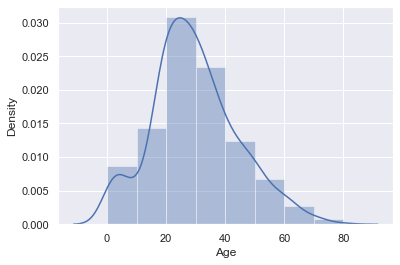

In [5]:
ax = sbn.distplot(df["Age"],bins=[10*i for i in range(10)])

In [6]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [7]:
df.head()
df["Embarked"] = df["Embarked"].fillna("S")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Column Types ####
* Categorical: `Embarked` and `Sex`

In [10]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Male/Female Age Not Survived'>

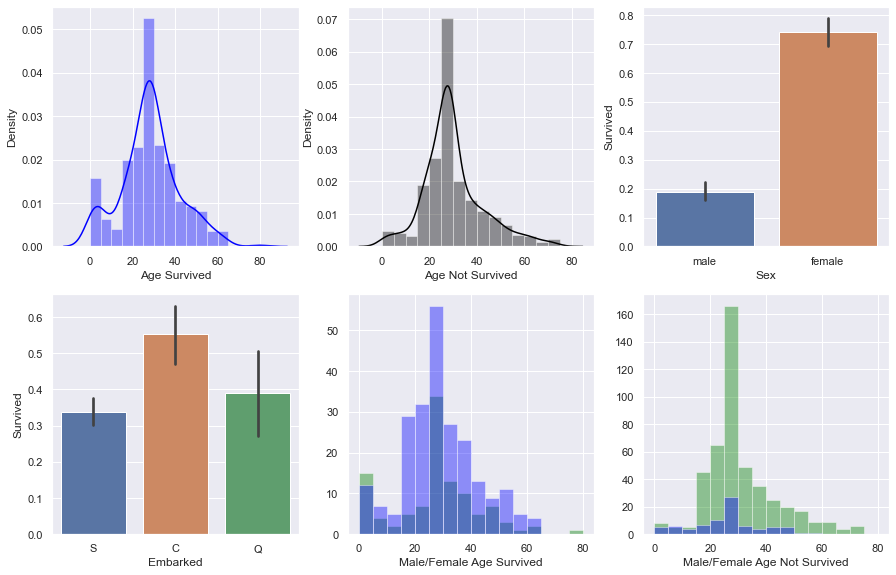

In [12]:
df_s = df[df["Survived"]==1]
df_ns = df[df["Survived"]==0]

plt.figure(figsize=[15,15])
plt.subplot(331)
sbn.distplot(df_s["Age"], bins=range(0, 81, 5), kde=True, color="blue", axlabel="Age Survived")
plt.subplot(332)
sbn.distplot(df_ns["Age"], bins=range(0, 81, 5), kde=True, color="black", axlabel="Age Not Survived")

plt.subplot(333)
sbn.barplot('Sex', 'Survived', data=df)
plt.subplot(334)
sbn.barplot('Embarked', 'Survived', data=df)

df_sm = df[(df['Survived']==1) & (df['Sex']=="male")]
df_sf = df[(df['Survived']==1) & (df['Sex']=="female")]

df_nsm = df[(df['Survived']==0) & (df['Sex']=="male")]
df_nsf = df[(df['Survived']==0) & (df['Sex']=="female")]

plt.subplot(335)
sbn.distplot(df_sm["Age"], bins=range(0, 81, 5), kde=False, color="green")
sbn.distplot(df_sf["Age"], bins=range(0, 81, 5), kde=False, color="blue", axlabel="Male/Female Age Survived")

plt.subplot(336)
sbn.distplot(df_nsm["Age"], bins=range(0, 81, 5), kde=False, color="green")
sbn.distplot(df_nsf["Age"], bins=range(0, 81, 5), kde=False, color="blue", axlabel="Male/Female Age Not Survived")

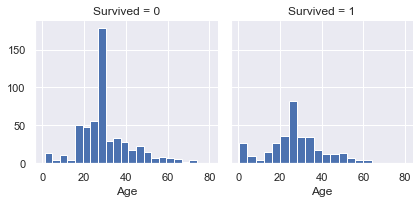

In [13]:
g = sbn.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

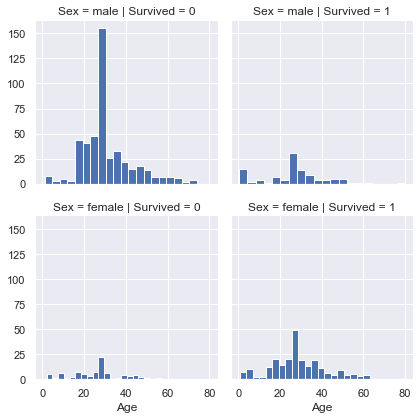

In [14]:
g = sbn.FacetGrid(df, col='Survived', row="Sex")
g.map(plt.hist, 'Age', bins=20)

In [15]:
df["Embarked_cat"] = df["Embarked"].astype('category')
df["Embarked"] = df["Embarked_cat"].cat.codes

In [16]:
df["Sex_cat"] = df["Sex"].astype('category')
df["Sex"] = df["Sex_cat"].cat.codes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Sex           891 non-null    int8    
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Fare          891 non-null    float64 
 8   Embarked      891 non-null    int8    
 9   Embarked_cat  891 non-null    category
 10  Sex_cat       891 non-null    category
dtypes: category(2), float64(2), int64(5), int8(2)
memory usage: 52.4 KB


In [18]:
df.drop(["PassengerId"], axis=1).corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_cat,Sex_cat
0,1,0,3,1,22.0,1,0,7.2500,2,S,male
1,2,1,1,0,38.0,1,0,71.2833,0,C,female
2,3,1,3,0,26.0,0,0,7.9250,2,S,female
3,4,1,1,0,35.0,1,0,53.1000,2,S,female
4,5,0,3,1,35.0,0,0,8.0500,2,S,male


## Training ##

In [22]:
def basic_logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_train, y_train)
    print(f"score: {score}")
    print(f"Confusion Matrix\n {confusion_matrix(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)

score: 0.800561797752809
Confusion Matrix
 [[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



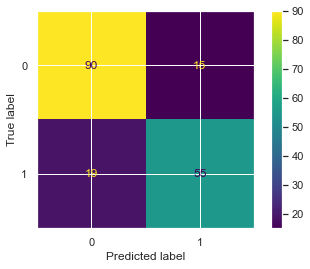

In [24]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = ["Survived"]
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.20, random_state=42)
basic_logistic_regression(X_train, X_test, y_train, y_test)
